In [3]:
#= install package
using Pkg
Pkg.add("Distributions") =#
using Distributions
using Plots
#= install package
using Pkg
Pkg.add("MultivariateStats") =#
using MultivariateStats
using Plots.PlotMeasures

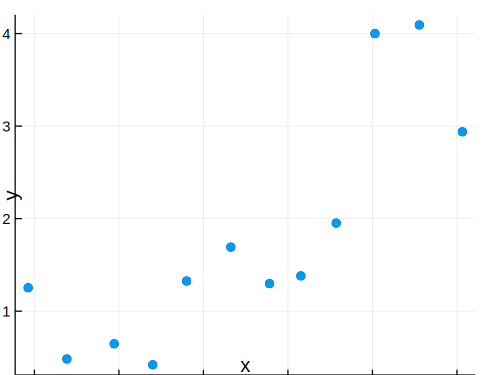

In [6]:
n = 12
d = 2

x = range(0,stop=5,length=n) + rand(Normal(),n)*0.05
y = x*0.7 + rand(Normal(),n)*0.5
X = reshape(x,(length(x),1))

scatter(x,y,xlabel="x",ylabel="y",
    legend=false,
    thickness_scaling=5,
    size=(2000,1500),
    markersize=20,
    left_margin=-30px,
    bottom_margin=-45px
)

Run linear regression

In [19]:
lr = llsq(X,y;bias=false)
function predict(x)
    return lr[1].*x
end

predict (generic function with 1 method)

### Visualizing PCA

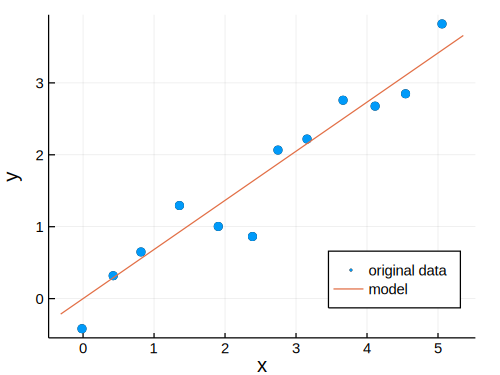

In [20]:
function make_plot(lr, x, y)
    # visualize the subspace spanned by W
    grid = range(minimum(x)-0.3,stop=maximum(x)+.3,length=1000)
    
    scatter(x,y, label="original data",
        xlabel="x",
        ylabel="y",
        thickness_scaling=5,
        markersize=20
    )
    
    plot!(grid, predict(grid), label="model",
        size=(2000,1500),
        legend=:bottomright,
        left_margin=-30px,
        bottom_margin=-45px
    )
end

make_plot(lr, x, y)

Moving to d=2

In [11]:
n = 12
d = 2

x1 = range(0,stop=5,length=n) + rand(Normal(),n)*0.05
x2 = -x1*0.2 + rand(Normal(),n)*2
xy = x1*0.7 + rand(Normal(),n)*3

X = hcat(x1,x2);

Let's look at the points.

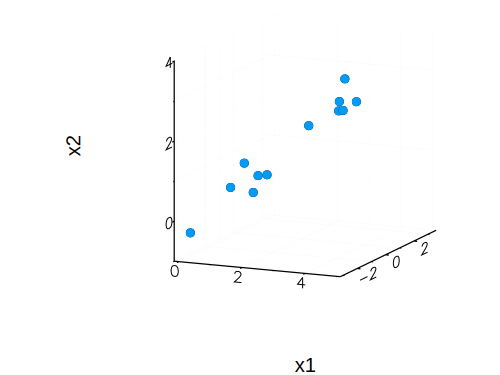

In [22]:
#= run once
Pkg.add("PyCall")
Pkg.add("LaTeXStrings") =#

# pyplot() # make 3d pannable when not in jupyter notebook
pygui(true) # make separate window and 3d pannable
plot(X[:,1],X[:,2],y,
    seriestype=:scatter3d,
    markersize=20,
    xlabel="x1",
    ylabel="x2",
    zlabel="y",
    legend=false,
    size=(2000,1500),
    thickness_scaling=5,
)

Let's look at what linear regression gives us...

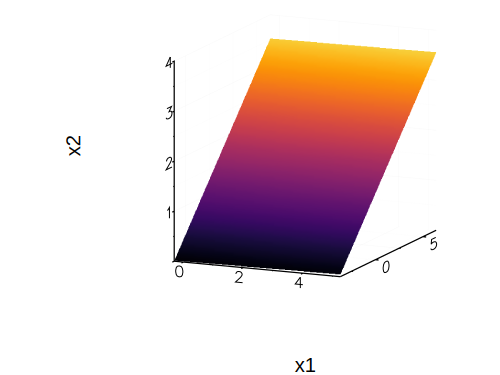

In [15]:
lr = llsq(X,y)

# get grid for visualizing plane
grid0 = range(minimum(X[:,1])-0.3,stop=maximum(X[:,1])+.3,length=100)
grid1 = range(minimum(X[:,2])-0.3,stop=maximum(X[:,2])+.3,length=100)
grid00 = repeat(grid0',100,1)[:]
grid11 = repeat(grid1,1,100)[:]
grid2d = hcat(grid00,grid11)

pred = lr[end].+grid2d*lr[1:end-1]

plot(grid0,grid1,pred,
    seriestype=:surface,
    xlabel="x1",
    ylabel="x2",
    zlabel="y",
    markersize=7,
    legend=false,
    size=(2000,1500),
    thickness_scaling=5)

In [16]:
lr

3-element Array{Float64,1}:
 0.6319091812197151   
 0.0033066195866007027
 0.22201463976266922  